# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./train-data/train.p"
validation_file= "./train-data/valid.p"
testing_file = "./train-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape
image_depth = image_shape[2]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Depth of data =", image_depth)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Depth of data = 3
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

hist  [  180.  1980.  2010.  1260.  1770.  1650.   360.  1290.  1260.  1320.
  1800.  1170.  1890.  1920.   690.   540.   360.   990.  1080.   180.
   300.   270.   330.   450.   240.  1350.   540.   210.   480.   240.
   390.   690.   210.   599.   360.  1080.   330.   180.  1860.   270.
   300.   210.   210.]


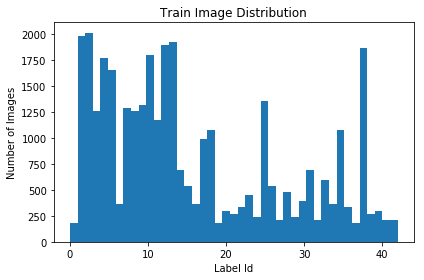

target  3015
target total 129645
Type  0 Speed limit (20km/h)


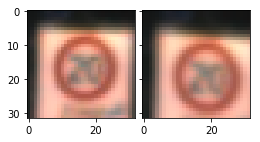

Type  1 Speed limit (30km/h)


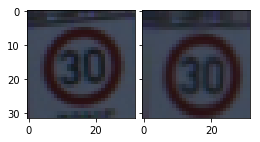

Type  2 Speed limit (50km/h)


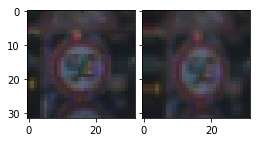

Type  3 Speed limit (60km/h)


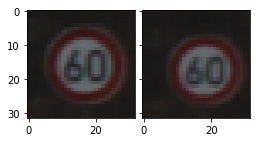

Type  4 Speed limit (70km/h)


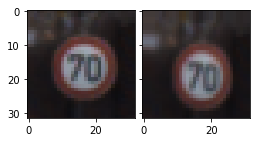

Type  5 Speed limit (80km/h)


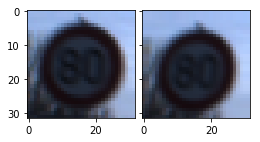

Type  6 End of speed limit (80km/h)


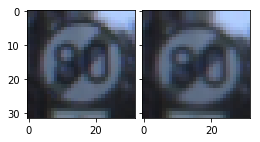

Type  7 Speed limit (100km/h)


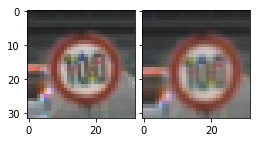

Type  8 Speed limit (120km/h)


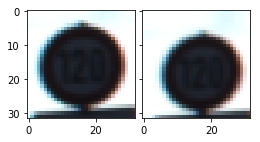

Type  9 No passing


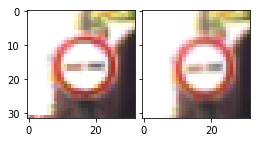

Type  10 No passing for vehicles over 3.5 metric tons


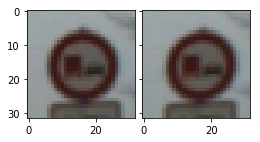

Type  11 Right-of-way at the next intersection


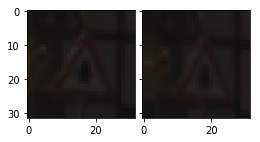

Type  12 Priority road


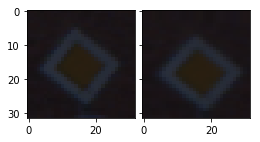

Type  13 Yield


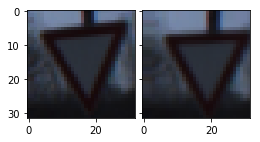

Type  14 Stop


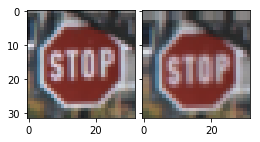

Type  15 No vehicles


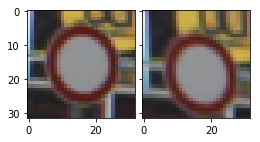

Type  16 Vehicles over 3.5 metric tons prohibited


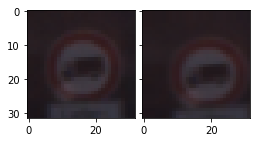

Type  17 No entry


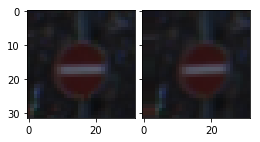

Type  18 General caution


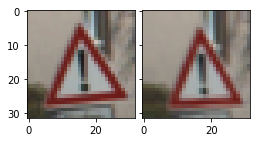

Type  19 Dangerous curve to the left


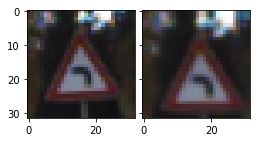

Type  20 Dangerous curve to the right


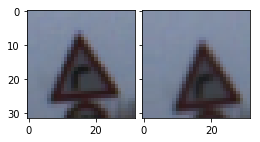

Type  21 Double curve


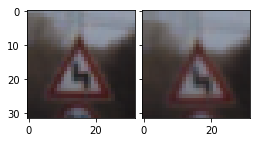

Type  22 Bumpy road


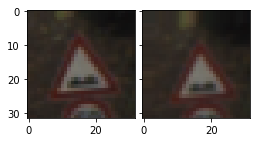

Type  23 Slippery road


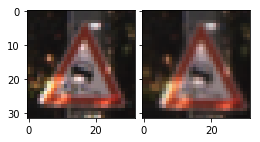

Type  24 Road narrows on the right


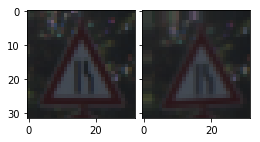

Type  25 Road work


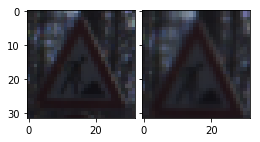

Type  26 Traffic signals


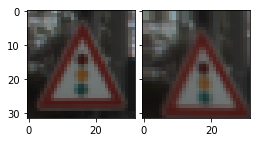

Type  27 Pedestrians


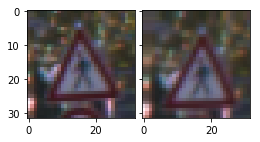

Type  28 Children crossing


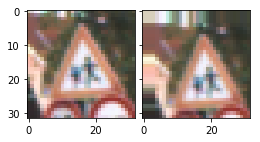

Type  29 Bicycles crossing


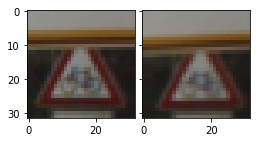

Type  30 Beware of ice/snow


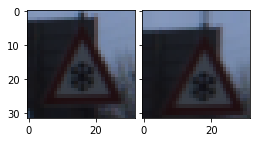

Type  31 Wild animals crossing


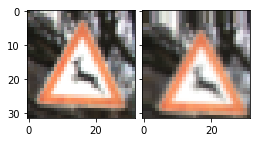

Type  32 End of all speed and passing limits


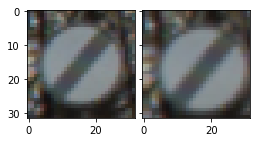

Type  33 Turn right ahead


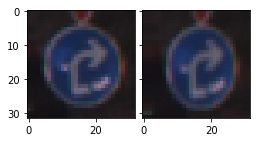

Type  34 Turn left ahead


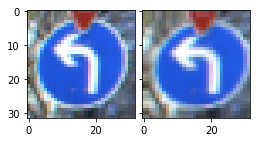

Type  35 Ahead only


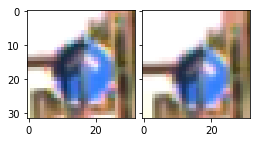

Type  36 Go straight or right


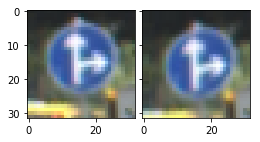

Type  37 Go straight or left


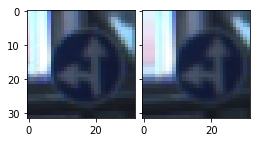

Type  38 Keep right


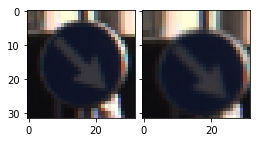

Type  39 Keep left


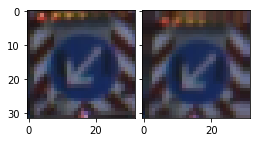

Type  40 Roundabout mandatory


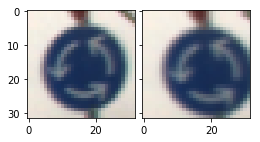

Type  41 End of no passing


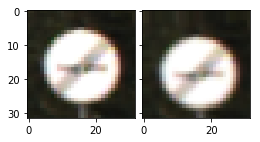

Type  42 End of no passing by vehicles over 3.5 metric tons


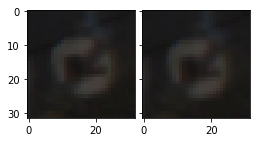

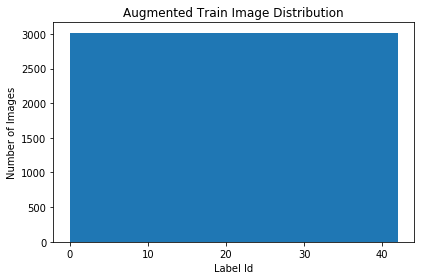

label[  0 ]: 3015.0  name:  Speed limit (20km/h)


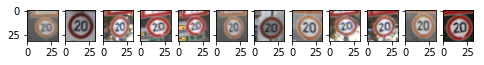

label[  1 ]: 3015.0  name:  Speed limit (30km/h)


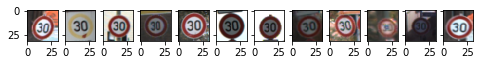

label[  2 ]: 3015.0  name:  Speed limit (50km/h)


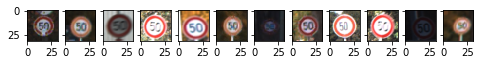

label[  3 ]: 3015.0  name:  Speed limit (60km/h)


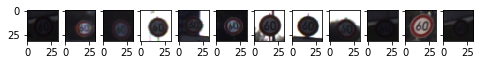

label[  4 ]: 3015.0  name:  Speed limit (70km/h)


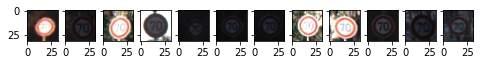

label[  5 ]: 3015.0  name:  Speed limit (80km/h)


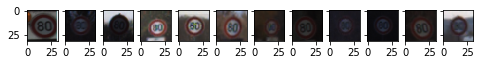

label[  6 ]: 3015.0  name:  End of speed limit (80km/h)


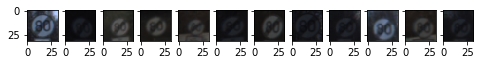

label[  7 ]: 3015.0  name:  Speed limit (100km/h)


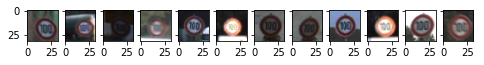

label[  8 ]: 3015.0  name:  Speed limit (120km/h)


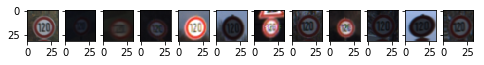

label[  9 ]: 3015.0  name:  No passing


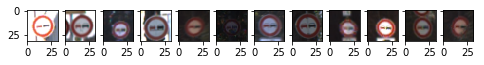

label[  10 ]: 3015.0  name:  No passing for vehicles over 3.5 metric tons


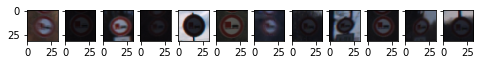

label[  11 ]: 3015.0  name:  Right-of-way at the next intersection


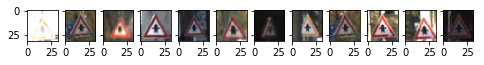

label[  12 ]: 3015.0  name:  Priority road


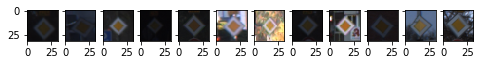

label[  13 ]: 3015.0  name:  Yield


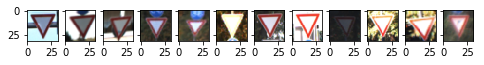

label[  14 ]: 3015.0  name:  Stop


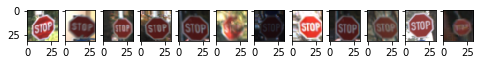

label[  15 ]: 3015.0  name:  No vehicles


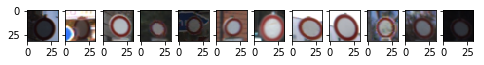

label[  16 ]: 3015.0  name:  Vehicles over 3.5 metric tons prohibited


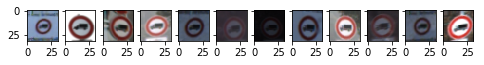

label[  17 ]: 3015.0  name:  No entry


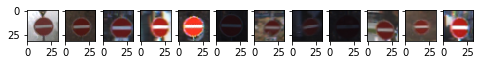

label[  18 ]: 3015.0  name:  General caution


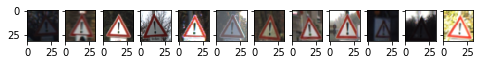

label[  19 ]: 3015.0  name:  Dangerous curve to the left


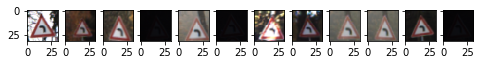

label[  20 ]: 3015.0  name:  Dangerous curve to the right


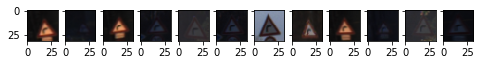

label[  21 ]: 3015.0  name:  Double curve


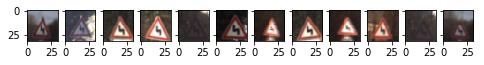

label[  22 ]: 3015.0  name:  Bumpy road


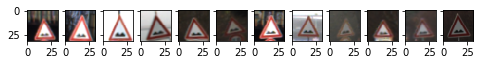

label[  23 ]: 3015.0  name:  Slippery road


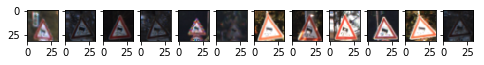

label[  24 ]: 3015.0  name:  Road narrows on the right


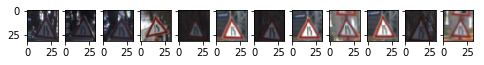

label[  25 ]: 3015.0  name:  Road work


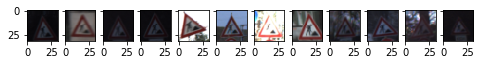

label[  26 ]: 3015.0  name:  Traffic signals


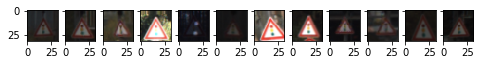

label[  27 ]: 3015.0  name:  Pedestrians


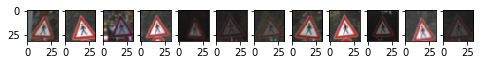

label[  28 ]: 3015.0  name:  Children crossing


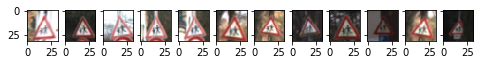

label[  29 ]: 3015.0  name:  Bicycles crossing


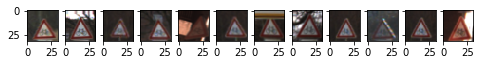

label[  30 ]: 3015.0  name:  Beware of ice/snow


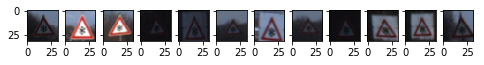

label[  31 ]: 3015.0  name:  Wild animals crossing


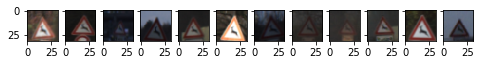

label[  32 ]: 3015.0  name:  End of all speed and passing limits


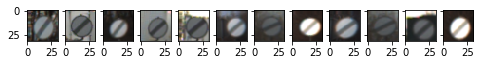

label[  33 ]: 3015.0  name:  Turn right ahead


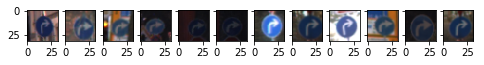

label[  34 ]: 3015.0  name:  Turn left ahead


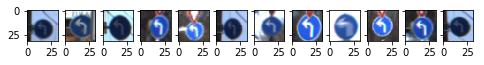

label[  35 ]: 3015.0  name:  Ahead only


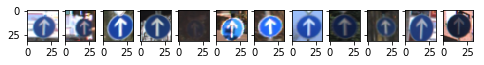

label[  36 ]: 3015.0  name:  Go straight or right


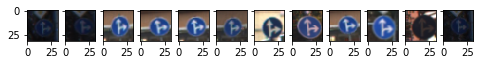

label[  37 ]: 3015.0  name:  Go straight or left


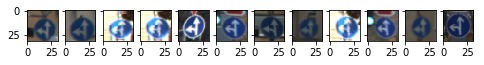

label[  38 ]: 3015.0  name:  Keep right


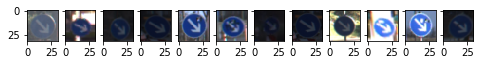

label[  39 ]: 3015.0  name:  Keep left


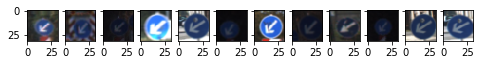

label[  40 ]: 3015.0  name:  Roundabout mandatory


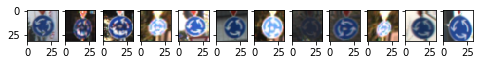

label[  41 ]: 3015.0  name:  End of no passing


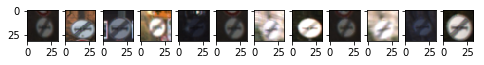

label[  42 ]: 3015.0  name:  End of no passing by vehicles over 3.5 metric tons


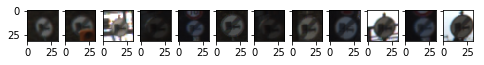

Number of training examples = 129645
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Depth of data = 3


In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from mpl_toolkits.axes_grid1 import ImageGrid


# Visualizations will be shown in the notebook.
%matplotlib inline

def show_image(images, index):
    image = images[index].squeeze()
    #print("min ", np.amin(image[:,:,0]), np.amax(image[:,:,0]))
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    print(y_train[index])
    
def show_single_image(image, index):
    #image = images[index].squeeze()
    #print("min ", np.amin(image[:,:,0]), np.amax(image[:,:,0]))
    print("Type ", index, trafficSignName(index))
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    print(y_train[index])
    
def compare_images(src1, src2, index, src3 = None, src4 = None):
    print("Type ", index, trafficSignName(index))
    ncols = 2
    if src3 != None:
        ncols += 1
    if src4 != None:
        ncols += 1
    fig = plt.figure(1, (4., 4.))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, ncols),  # creates 1xn grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
    grid[0].imshow(src1)
    grid[1].imshow(src2)
    if src3 != None:
        grid[2].imshow(src3)
    if src4 != None:
        grid[3].imshow(src4)
    plt.show()

traffic_labels = pd.read_csv('signnames.csv', sep=',')

def trafficSignName(num):
    return traffic_labels[traffic_labels['ClassId']==num]['SignName'][num]

fig, ax = plt.subplots()

# the histogram of the data
hist, bins, patches = ax.hist(y_train, n_classes)
print("hist ", hist)

ax.set_xlabel('Label Id')
ax.set_ylabel('Number of Images')
ax.set_title(r'Train Image Distribution')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

# Augment the training set
'''
shape = X_train.shape
X_aug = np.empty([0, shape[1], shape[2], shape[3]], dtype = X_train.dtype)
y_aug = np.empty([0], dtype = y_train.dtype)

X_aug = np.append(X_aug, X_train, axis = 0)
y_aug = np.append(y_aug, y_train)

print("shape ", X_train.shape, X_aug.shape)
print("shape ", y_train.shape, y_aug.shape)

show_flag = np.zeros((n_classes), dtype=int)
for j in range(shape[0]):
    image = None
    image1 = None
    image2 = None

    if y_train[j] == 11 or \
        y_train[j] == 13 or \
        y_train[j] == 18 or \
        y_train[j] == 19 or \
        y_train[j] == 20 or \
        y_train[j] == 22 or \
        y_train[j] == 26 or \
        y_train[j] == 30 or \
        y_train[j] == 33 or \
        y_train[j] == 34 or \
        y_train[j] == 35 or \
        y_train[j] == 36 or \
        y_train[j] == 37 or \
        y_train[j] == 38 or \
        y_train[j] == 39:
        image = cv2.flip(X_train[j], 1)
    elif y_train[j] == 32 or y_train[j] == 41:
        image = cv2.flip(X_train[j], -1)
    elif y_train[j] == 12 or y_train[j] == 15 or y_train[j] == 17:
        image = cv2.flip(X_train[j], 1)
        image1 = cv2.flip(X_train[j], 0)
        image2 = cv2.flip(X_train[j], -1)
        
    
    if image != None:
        if show_flag[y_train[j]] == 0:
            compare_images(X_train[j], image, y_train[j], image1, image2)
            show_flag[y_train[j]] = 1
        image = np.expand_dims(image, axis=0)
        X_aug = np.append(X_aug, image, axis = 0)
        
        if image1 != None:
            image1 = np.expand_dims(image1, axis = 0)
            X_aug = np.append(X_aug, image1, axis= 0)
            
        if image2 != None:
            image2 = np.expand_dims(image2, axis = 0)
            X_aug = np.append(X_aug, image2, axis= 0)
        if y_train[j] == 19:
            y_aug = np.append(y_aug, 20)
        elif y_train[j] == 20:
            y_aug = np.append(y_aug, 19)
        elif y_train[j] == 33:
            y_aug = np.append(y_aug, 34)
        elif y_train[j] == 34:
            y_aug = np.append(y_aug, 33)
        elif y_train[j] == 36:
            y_aug = np.append(y_aug, 37)
        elif y_train[j] == 37:
            y_aug = np.append(y_aug, 36)
        elif y_train[j] == 38:
            y_aug = np.append(y_aug, 39)
        elif y_train[j] == 39:
            y_aug = np.append(y_aug, 38)
        elif y_train[j] == 12 or y_train[j] == 15 or y_train[j] == 17:
            y_aug = np.append(y_aug, y_train[j])
            y_aug = np.append(y_aug, y_train[j])
            y_aug = np.append(y_aug, y_train[j])
        else:
            y_aug = np.append(y_aug, y_train[j])

X_train = X_aug
y_train = y_aug

print("shape ", X_train.shape)
print("shape ", y_train.shape)
fig, ax = plt.subplots()

# the histogram of the data
hist, bins, patches = ax.hist(y_train, n_classes)
print("hist ", hist)

ax.set_xlabel('Label Id')
ax.set_ylabel('Number of Images')
ax.set_title(r'Augmented Train Image Distribution')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()
'''

target_num = np.int(np.max(hist) * 3 / 2)
print("target ", target_num)

target_total = target_num * n_classes
print("target total", target_total)

shape = X_train.shape

X_aug = np.zeros((target_total, shape[1], shape[2], shape[3]), dtype= X_train.dtype)
y_aug = np.zeros((target_total), dtype= y_train.dtype)

X_aug[0:shape[0],:,:,:] = X_train
y_aug[0:shape[0]] = y_train

p = shape[0]
show_flag = np.zeros((n_classes), dtype=int)
for i in range(n_classes):
    n = np.count_nonzero(y_train == i)
    pad_n = np.int(target_num - n)
    
    l = np.where(y_train == i)
    l = shuffle(l[0])
    #print("i: ", i, "l :", l)
    points = np.random.randint(low=0, high = 4, size=(pad_n, 3, 2))
    #print("points ", points)
    index = 0
    for j in range(pad_n):
        src = np.array([[32,32],[63,32],[32,63]])
        dst = src + points[j]
        #dst[0][0] += points[j][0][0]
        #dst[0][1] += points[j][0][1]
        #dst[1][0] -= points[j][1][0]
        #dst[1][1] += points[j][1][1]
        #dst[2][0] += points[j][2][0]
        #dst[2][1] -= points[j][2][1]

        warp_mat = cv2.getAffineTransform(np.float32(src), np.float32(dst))
        if index == n:
            index = 0
        image_expand = cv2.copyMakeBorder(X_train[l[index]], 32, 32, 32, 32, cv2.BORDER_REPLICATE)
        image_expand = cv2.warpAffine(image_expand,warp_mat, (96,96))
        image = image_expand[32:64,32:64,:]
        if show_flag[i] == 0:
            #print("src ", src)
            #print("dst ", dst)
            compare_images(X_train[l[index]], image, i)
            show_flag[i] = 1
        #image = np.expand_dims(image, axis = 0)
        X_aug[p] = image
        y_aug[p] = i
        p += 1
        index += 1

show_num = 12
selected_pics = np.zeros([n_classes, show_num])

X_train = X_aug
y_train = y_aug

# the histogram of the data
fig, ax = plt.subplots()
hist, bins, patches = ax.hist(y_train, n_classes)

ax.set_xlabel('Label Id')
ax.set_ylabel('Number of Images')
ax.set_title(r'Augmented Train Image Distribution')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

for i in range(n_classes):
    #n = np.count_nonzero(y_train == i)
    #hist.append(n)
    #condlist = [y_train == i]
    #choicelist = [range(n_train)]
    l = np.where(y_train == i)
    l = shuffle(l[0])
    print("label[ ", i, "]:", hist[i], " name: ", trafficSignName(i))

    fig = plt.figure(1, (8., 8.))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, show_num),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
    for j in range(show_num):
        im = X_train[l[j]]
        selected_pics[i][j] = l[j]
        grid[j].imshow(im)
    plt.show()

n_train = len(X_train)

n_test = len(X_test)

image_shape = X_train[0].shape
image_depth = image_shape[2]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Depth of data =", image_depth)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2

def yuv_normalization(images):
    output = np.ndarray(images.shape, dtype=np.float64)
    for i, image in enumerate(images):
        img = np.float64(image)
        mean = np.mean(img[:,:,0], dtype = np.float64)
        img[:,:,0] -= mean
        img = img / 256.0
        output[i] = img
    return output

def rescale_normalized_yuv(image):
    #print("image ", image)
    image[:,:,0] = image[:,:,0] * 128 + 128
    image[:,:,1] = image[:,:,1] * 256
    image[:,:,2] = image[:,:,2] * 256
    #print("image ", image)
    return np.uint8(image)

def rgb2yuv(images):
    output = np.ndarray(images.shape, dtype=np.uint8)
    for i, image in enumerate(images):
        image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        image[:,:,0] = cv2.equalizeHist(image[:,:,0])
        output[i] = image
    return output


X_train_yuv = rgb2yuv(X_train)
X_test_yuv = rgb2yuv(X_test)
X_valid_yuv = rgb2yuv(X_valid)

X_train_norm = yuv_normalization(X_train_yuv)
X_test_norm = yuv_normalization(X_test_yuv)
X_valid_norm = yuv_normalization(X_valid_yuv)

print("train: global min ", np.min(X_train[:,:,:,0]), np.min(X_train[:,:,:,1]), np.min(X_train[:,:,:,2]))
print("processed: global min ", np.min(X_train_yuv[:,:,:,0]), np.min(X_train_yuv[:,:,:,1]), np.min(X_train_yuv[:,:,:,2]))
print("normalized: global min ", np.min(X_train_norm[:,:,:,0]), np.min(X_train_norm[:,:,:,1]), np.min(X_train_norm[:,:,:,2]))
print("train: global max ", np.max(X_train[:,:,:,0]), np.max(X_train[:,:,:,1]), np.max(X_train[:,:,:,2]))
print("processed: global max ", np.max(X_train_yuv[:,:,:,0]), np.max(X_train_yuv[:,:,:,1]), np.max(X_train_yuv[:,:,:,2]))
print("normalized: global max ", np.max(X_train_norm[:,:,:,0]), np.max(X_train_norm[:,:,:,1]), np.max(X_train_norm[:,:,:,2]))
print("train: global mean ", np.mean(X_train[:,:,:,0]), np.mean(X_train[:,:,:,1]), np.mean(X_train[:,:,:,2]))
print("processed: global mean ", np.mean(X_train_yuv[:,:,:,0]), np.mean(X_train_yuv[:,:,:,1]), np.mean(X_train_yuv[:,:,:,2]))
print("normalized: global mean ", np.mean(X_train_norm[:,:,:,0]), np.mean(X_train_norm[:,:,:,1]), np.mean(X_train_norm[:,:,:,2]))
#print("shape ", X_train.shape)
#print("type ", X_train.dtype)
image_depth = X_train_norm[0].shape[2]


train: global min  0 3 0
processed: global min  0 46 0
normalized: global min  -0.720970153809 0.1796875 0.0
train: global max  255 255 255
processed: global max  255 228 250
normalized: global max  0.577243804932 0.890625 0.9765625
train: global mean  87.5769345421 81.2577732477 84.0227796639
processed: global mean  131.241257383 130.329853963 129.07719129
normalized: global mean  0.0 0.509100992042 0.504207778478


label[  0 ]: 3015  name:  Speed limit (20km/h)


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


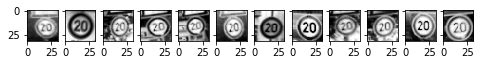

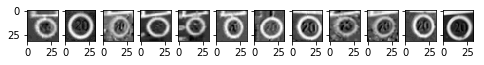

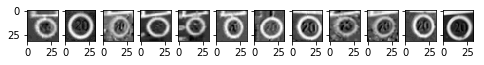

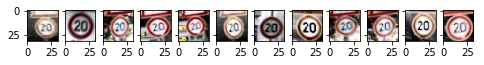

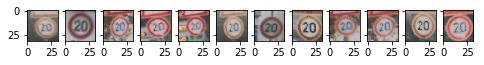

label[  1 ]: 3015  name:  Speed limit (30km/h)


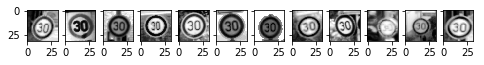

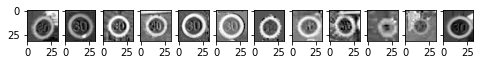

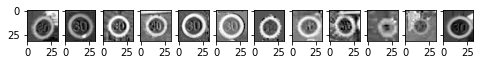

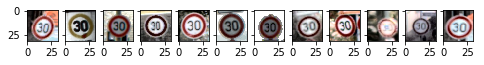

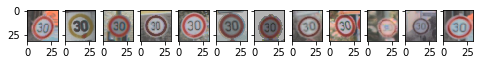

label[  2 ]: 3015  name:  Speed limit (50km/h)


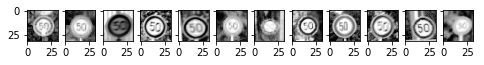

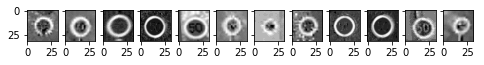

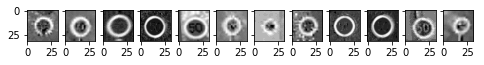

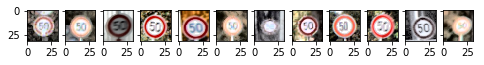

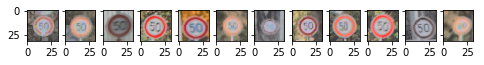

label[  3 ]: 3015  name:  Speed limit (60km/h)


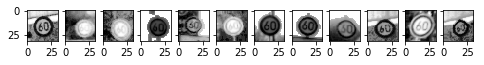

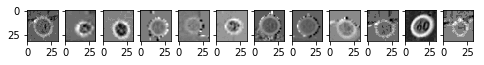

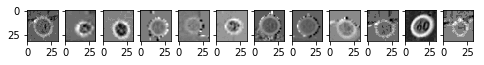

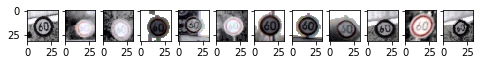

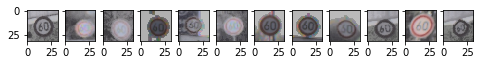

label[  4 ]: 3015  name:  Speed limit (70km/h)


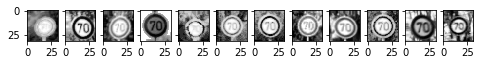

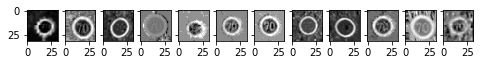

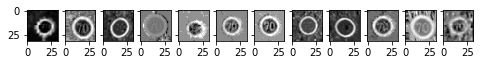

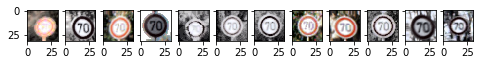

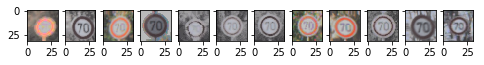

label[  5 ]: 3015  name:  Speed limit (80km/h)


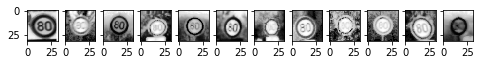

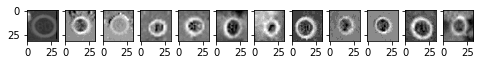

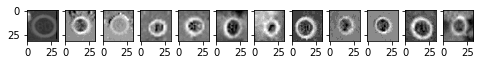

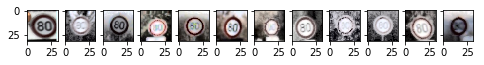

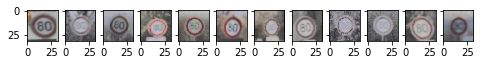

label[  6 ]: 3015  name:  End of speed limit (80km/h)


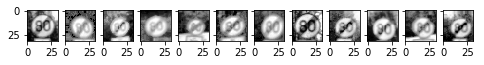

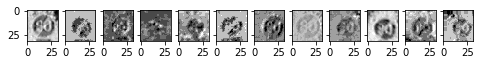

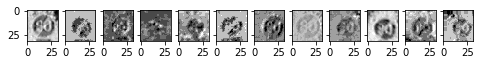

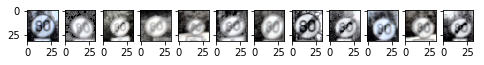

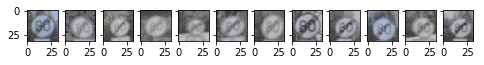

label[  7 ]: 3015  name:  Speed limit (100km/h)


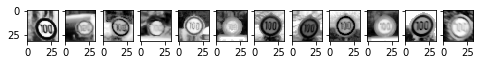

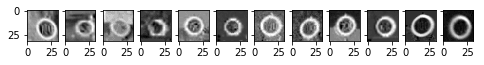

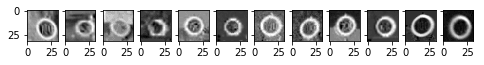

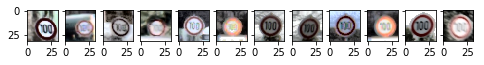

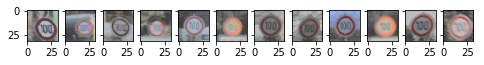

label[  8 ]: 3015  name:  Speed limit (120km/h)


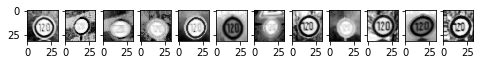

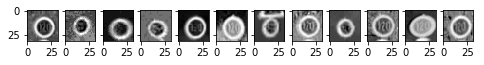

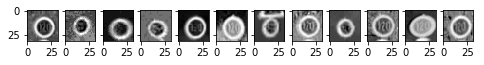

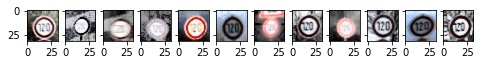

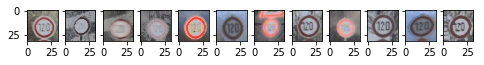

label[  9 ]: 3015  name:  No passing


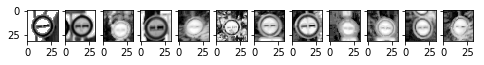

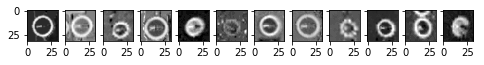

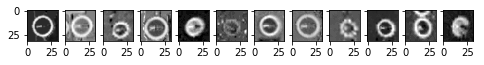

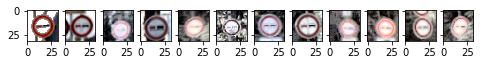

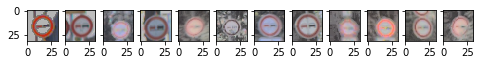

label[  10 ]: 3015  name:  No passing for vehicles over 3.5 metric tons


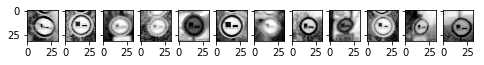

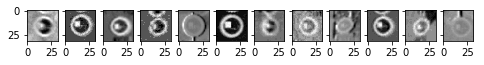

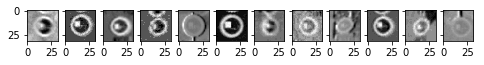

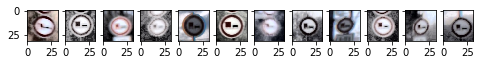

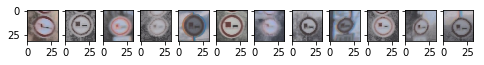

label[  11 ]: 3015  name:  Right-of-way at the next intersection


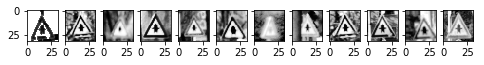

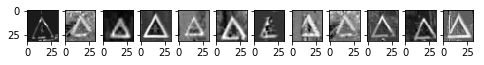

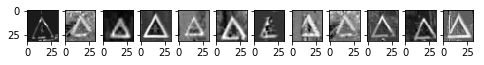

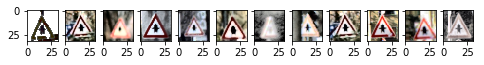

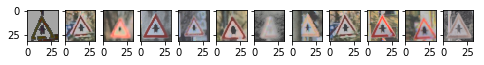

label[  12 ]: 3015  name:  Priority road


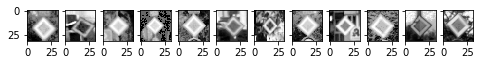

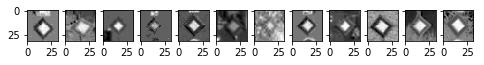

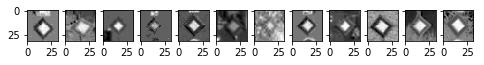

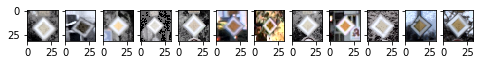

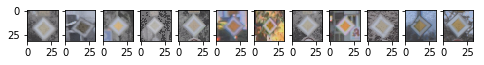

label[  13 ]: 3015  name:  Yield


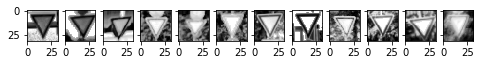

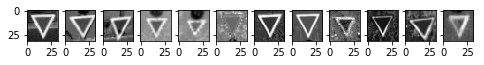

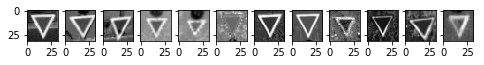

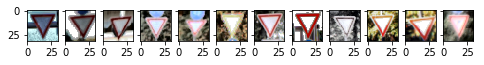

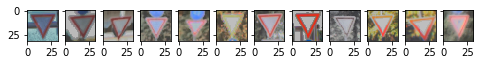

label[  14 ]: 3015  name:  Stop


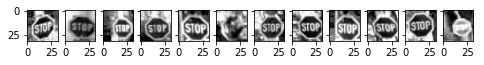

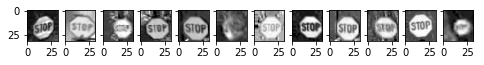

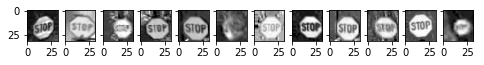

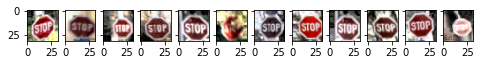

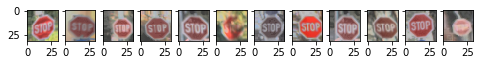

label[  15 ]: 3015  name:  No vehicles


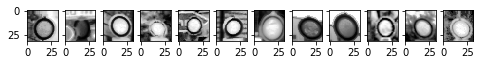

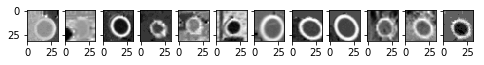

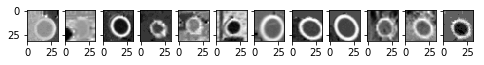

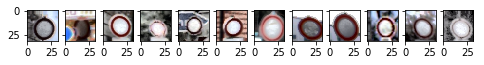

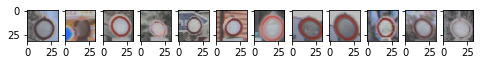

label[  16 ]: 3015  name:  Vehicles over 3.5 metric tons prohibited


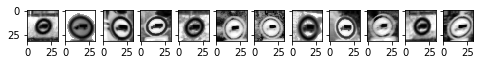

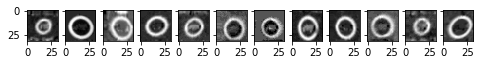

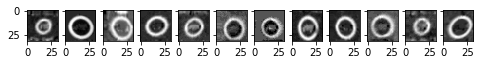

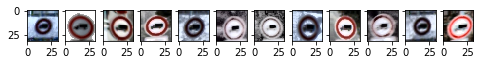

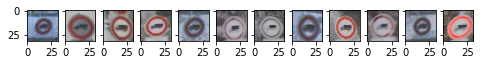

label[  17 ]: 3015  name:  No entry


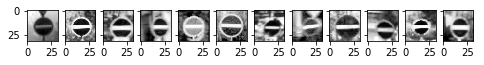

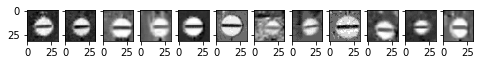

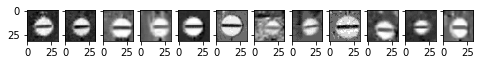

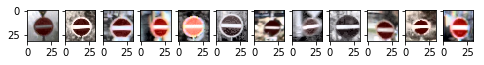

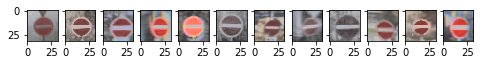

label[  18 ]: 3015  name:  General caution


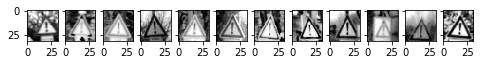

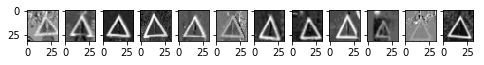

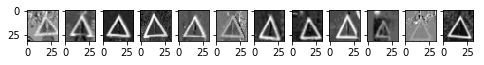

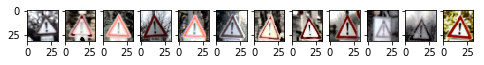

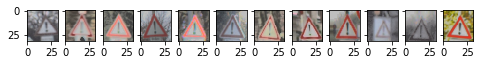

label[  19 ]: 3015  name:  Dangerous curve to the left


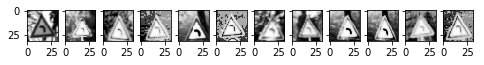

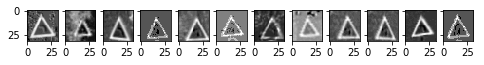

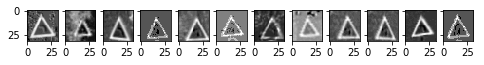

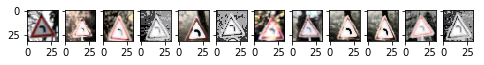

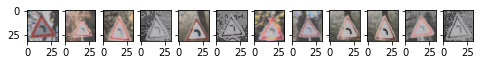

label[  20 ]: 3015  name:  Dangerous curve to the right


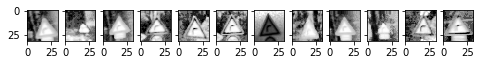

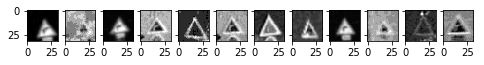

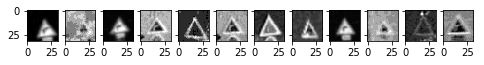

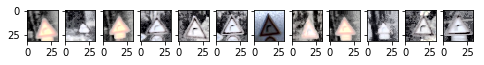

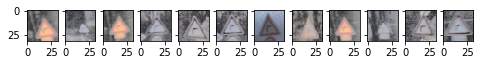

label[  21 ]: 3015  name:  Double curve


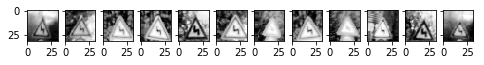

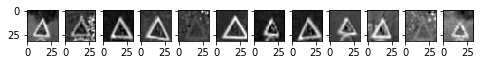

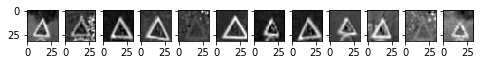

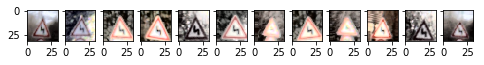

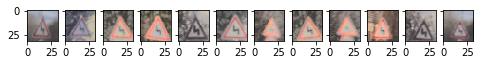

label[  22 ]: 3015  name:  Bumpy road


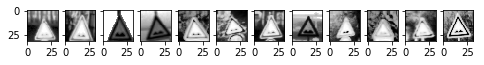

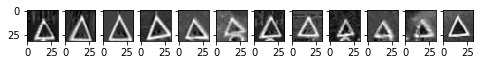

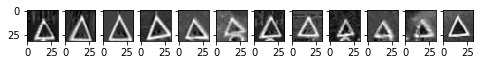

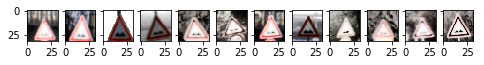

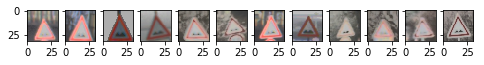

label[  23 ]: 3015  name:  Slippery road


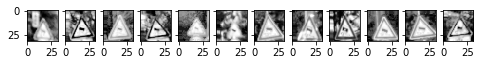

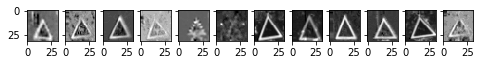

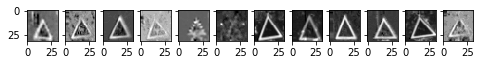

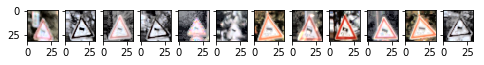

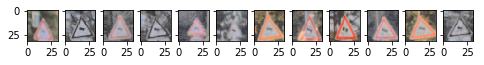

label[  24 ]: 3015  name:  Road narrows on the right


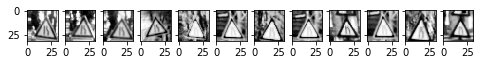

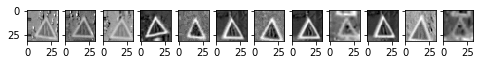

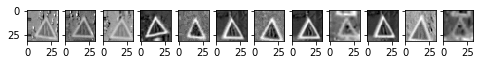

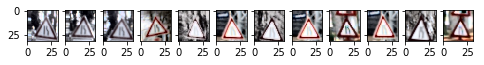

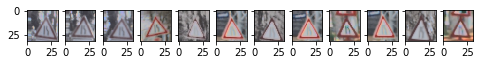

label[  25 ]: 3015  name:  Road work


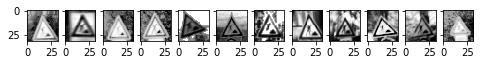

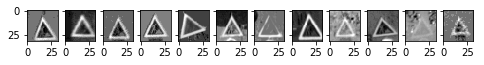

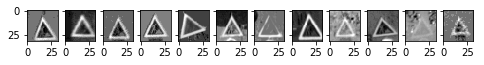

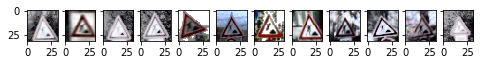

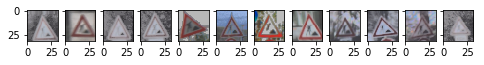

label[  26 ]: 3015  name:  Traffic signals


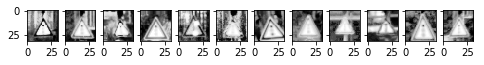

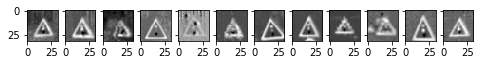

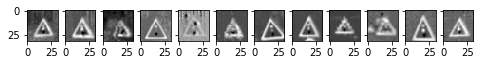

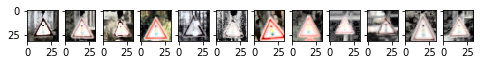

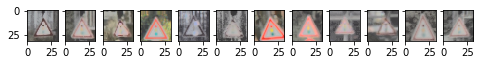

label[  27 ]: 3015  name:  Pedestrians


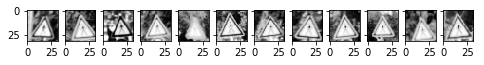

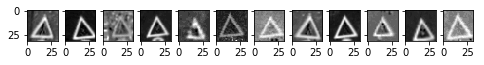

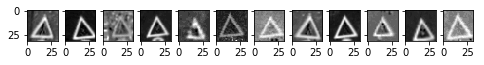

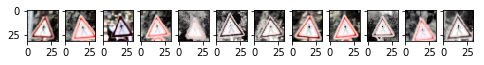

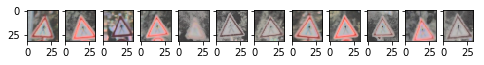

label[  28 ]: 3015  name:  Children crossing


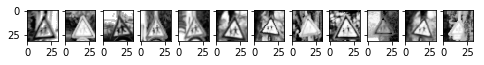

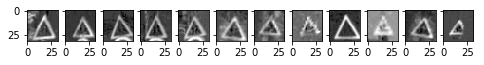

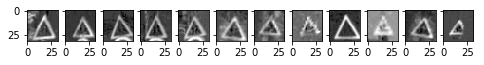

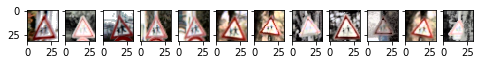

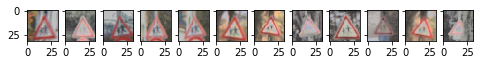

label[  29 ]: 3015  name:  Bicycles crossing


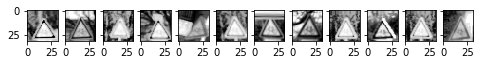

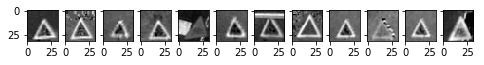

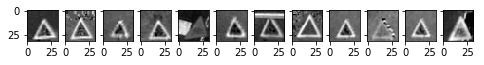

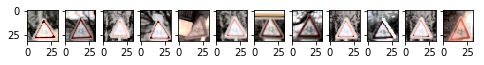

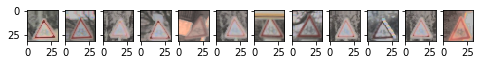

label[  30 ]: 3015  name:  Beware of ice/snow


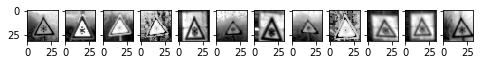

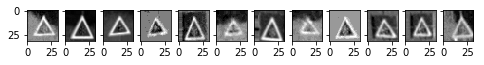

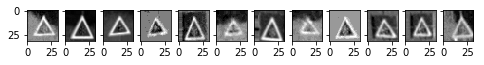

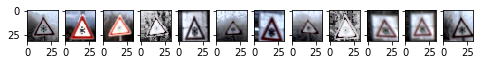

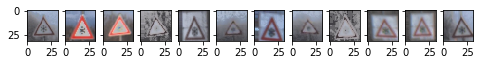

label[  31 ]: 3015  name:  Wild animals crossing


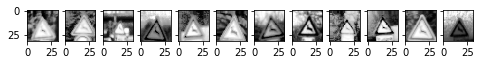

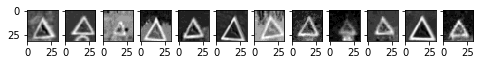

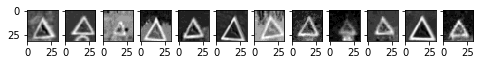

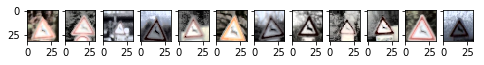

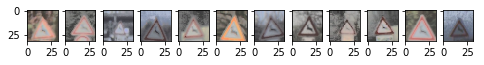

label[  32 ]: 3015  name:  End of all speed and passing limits


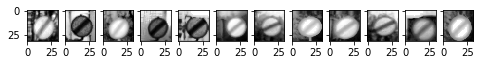

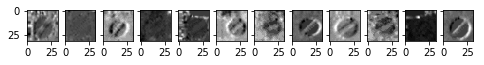

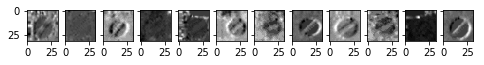

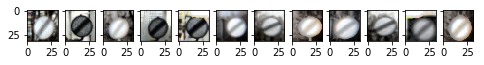

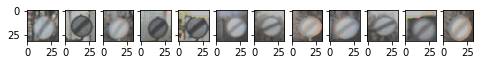

label[  33 ]: 3015  name:  Turn right ahead


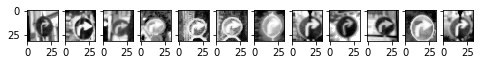

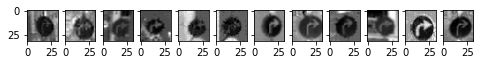

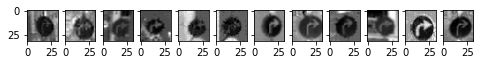

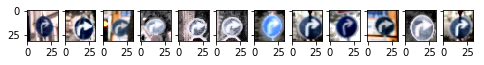

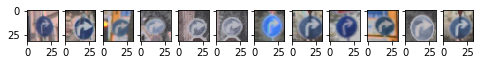

label[  34 ]: 3015  name:  Turn left ahead


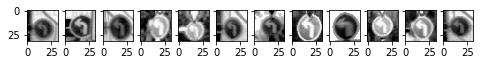

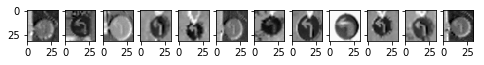

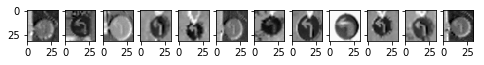

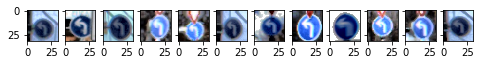

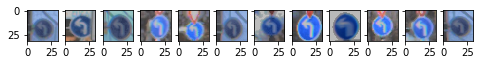

label[  35 ]: 3015  name:  Ahead only


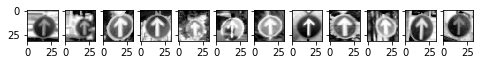

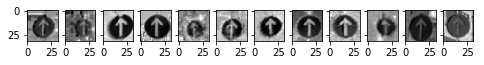

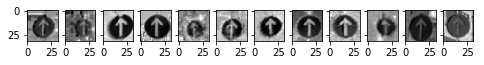

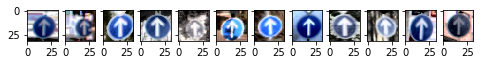

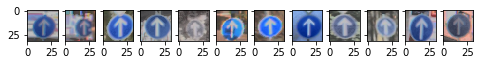

label[  36 ]: 3015  name:  Go straight or right


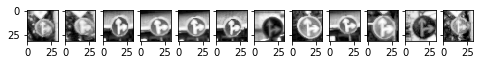

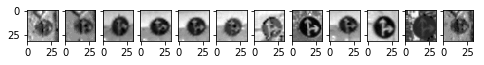

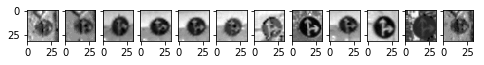

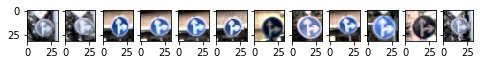

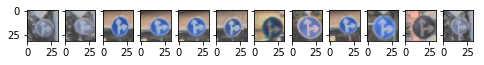

label[  37 ]: 3015  name:  Go straight or left


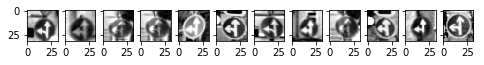

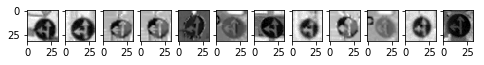

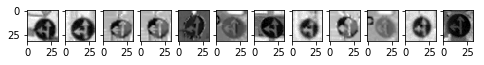

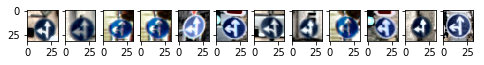

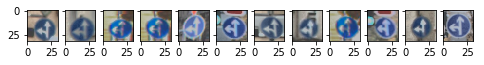

label[  38 ]: 3015  name:  Keep right


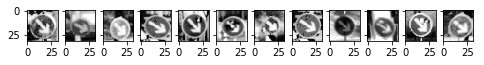

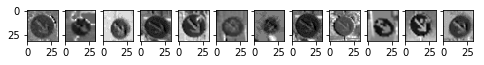

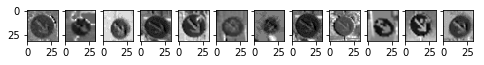

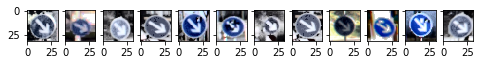

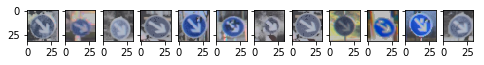

label[  39 ]: 3015  name:  Keep left


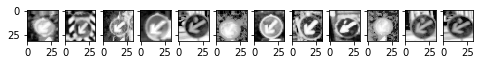

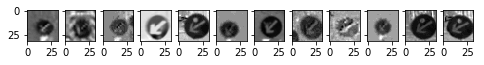

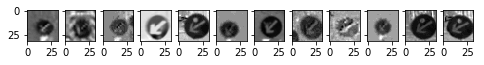

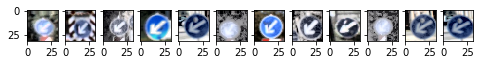

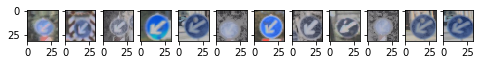

label[  40 ]: 3015  name:  Roundabout mandatory


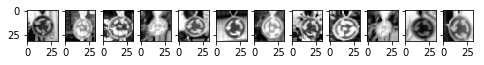

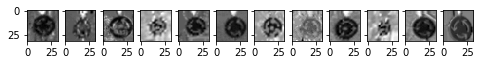

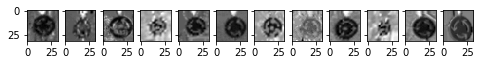

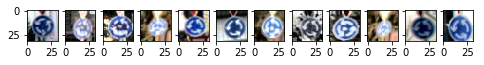

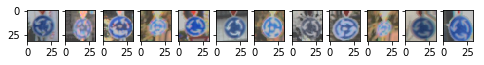

label[  41 ]: 3015  name:  End of no passing


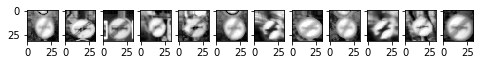

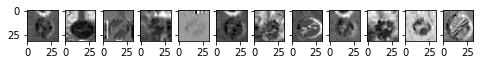

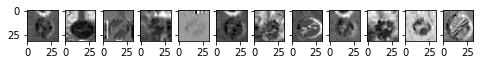

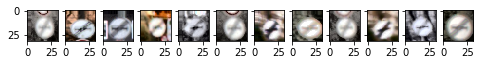

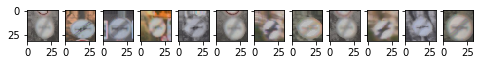

label[  42 ]: 3015  name:  End of no passing by vehicles over 3.5 metric tons


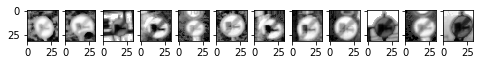

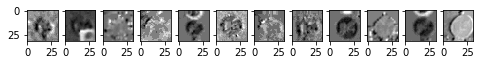

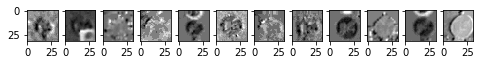

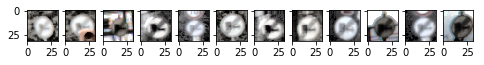

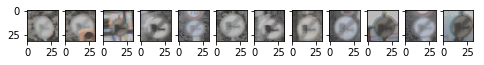

In [5]:
def show_processed_images(X_yuv, X_norm, indecis, y, num_classes, num_images):
    shape = X_yuv[0].shape
    tmp = np.zeros((num_images, shape[0], shape[1], shape[2]), dtype=X_yuv.dtype)
    
    shape = X_norm[0].shape
    tmp_norm = np.zeros((num_images, shape[0], shape[1], shape[2]), dtype=X_norm.dtype)
    for i in range(num_classes):
        n = np.count_nonzero(y == i)
        print("label[ ", i, "]:", n, " name: ", trafficSignName(i))
        
        for j in range(num_images):
            tmp[j] = X_yuv[indecis[i][j]]
            tmp_norm[j] = X_norm[indecis[i][j]]
        #print("tmp type", tmp.dtype)
        #print("train type", X_train_processed.dtype)

        #print("Y: ")
        fig = plt.figure(1, (8., 8.))
        grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(1, num_images),  # creates 2x2 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )
        for j in range(num_images):
            grid[j].imshow(tmp[j,:,:,0], cmap='gray')
        plt.show()
    
        #print("U: ")
        fig = plt.figure(1, (8., 8.))
        grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(1, num_images),  # creates 2x2 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )
        for j in range(num_images):
            grid[j].imshow(tmp[j,:,:,1], cmap='gray')
        plt.show()

        #print("V: ")
        fig = plt.figure(1, (8., 8.))
        grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(1, num_images),  # creates 2x2 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )
        for j in range(num_images):
            grid[j].imshow(tmp[j,:,:,1], cmap='gray')
        plt.show()

        #print("Color: ")
        fig = plt.figure(1, (8., 8.))
        grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(1, num_images),  # creates 2x2 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )
        for j in range(num_images):
            #print("dtype ", tmp[j].dtype)
            tmp[j] = cv2.cvtColor(tmp[j], cv2.COLOR_YUV2RGB)
            grid[j].imshow(tmp[j])
        plt.show()
    
        fig = plt.figure(1, (8., 8.))
        grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(1, num_images),  # creates 2x2 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )
        for j in range(num_images):
            #print("dtype ", tmp[j].dtype)
            img = rescale_normalized_yuv(tmp_norm[j])
            img = cv2.cvtColor(img, cv2.COLOR_YUV2RGB)
            grid[j].imshow(img)
        plt.show()


show_processed_images(X_train_yuv, X_train_norm, selected_pics, y_train, n_classes, show_num)

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

MU = 0
SIGMA = 0.1


def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    nf0 = 64
    conv0_W = tf.Variable(tf.truncated_normal(shape=(1, 1, image_depth, nf0), mean = mu, stddev = sigma))
    conv0_b = tf.Variable(tf.zeros(nf0))
    conv0 = tf.nn.conv2d(x, conv0_W, strides=[1, 1, 1, 1], padding='VALID') + conv0_b
    #32x32x8
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x16.
    nf1 = 128
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, nf0, nf1), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(nf1))
    conv1   = tf.nn.conv2d(conv0, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #14x14x128

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    nf2 = 256
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, nf1, nf2), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(nf2))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    #10x10x256
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #conv2 = tf.nn.dropout(conv2, 0.5)
    #5x5x256

    '''
    nf3 = 64
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, nf2, nf3), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(nf3))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    conv3 = tf.nn.relu(conv3)
    # 8x8x64
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #conv3 = tf.nn.dropout(conv3, 0.5)
    # 4x4x64
    '''
    
    # SOLUTION: Flatten. Input = 5x5x32. Output = 400.
    # 16x16x16
    f1 = flatten(conv1)
    # 8x8x32
    f2 = flatten(conv2)
    # 4x4x64
    #f3 = flatten(conv3)
    fc0 = tf.concat(1, [f1, f2])#, f3])
    nfc0 = 14*14*nf1 + 5*5*nf2# + 4*4*nf3
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    nfc1 = 512
    fc1_W = tf.Variable(tf.truncated_normal(shape=(nfc0, nfc1), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(nfc1))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, 0.5)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    nfc2 = 256
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(nfc1, nfc2), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(nfc2))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    nfc3 = 128
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(nfc2, nfc3), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(nfc3))
    fc3    = tf.matmul(fc2, fc3_W) + fc3_b
    
    # SOLUTION: Activation.
    fc3    = tf.nn.relu(fc3)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(nfc3, n_classes), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc3, fc4_W) + fc4_b
    
    return logits


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [7]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from sklearn.utils import shuffle

EPOCHS = 20
BATCH_SIZE = 128

x = tf.placeholder(tf.float32, (None, 32, 32, image_depth))
#v = tf.placeholder(tf.float32, (None, 32, 32, image_depth))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

# Training pipeline
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


#evaluation

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# training the model

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_norm)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_norm, y_train = shuffle(X_train_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_norm, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")
    
# Test the model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Training...

EPOCH 1 ...
Validation Accuracy = 0.848

EPOCH 2 ...
Validation Accuracy = 0.876

EPOCH 3 ...
Validation Accuracy = 0.902

EPOCH 4 ...
Validation Accuracy = 0.924

EPOCH 5 ...
Validation Accuracy = 0.940

EPOCH 6 ...
Validation Accuracy = 0.935

EPOCH 7 ...
Validation Accuracy = 0.939

EPOCH 8 ...
Validation Accuracy = 0.951

EPOCH 9 ...
Validation Accuracy = 0.944

EPOCH 10 ...
Validation Accuracy = 0.953

EPOCH 11 ...
Validation Accuracy = 0.939

EPOCH 12 ...
Validation Accuracy = 0.956

EPOCH 13 ...
Validation Accuracy = 0.945

EPOCH 14 ...
Validation Accuracy = 0.947

EPOCH 15 ...
Validation Accuracy = 0.958

EPOCH 16 ...
Validation Accuracy = 0.947

EPOCH 17 ...
Validation Accuracy = 0.961

EPOCH 18 ...
Validation Accuracy = 0.969

EPOCH 19 ...
Validation Accuracy = 0.968

EPOCH 20 ...
Validation Accuracy = 0.966

Model saved
Test Accuracy = 0.940


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

row  6


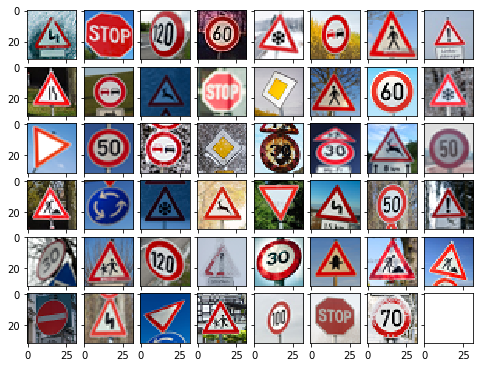

In [8]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
import os.path
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import ImageGrid

'''
directory = 'test-data/'

file_num = len(os.listdir(directory))

file_list = []
for root, dirs, files in os.walk(directory, topdown=False):
    for i, fn in enumerate(files):
        img_name = directory+fn
        if img_name.lower().endswith('.bmp'):
            #print("image: ", img_name)
            #image = mpimg.imread(img_name)
            #plt.imshow(image)
            #plt.show()
            file_list.append(img_name)
print("file list:", file_list)
print("num: ", len(file_list))
'''

test_file = pd.read_csv('test.csv', sep=',')
test_y = test_file['ClassId'].as_matrix()
file_list = test_file['FilePath'].as_matrix()

#print('test y:', test_y.shape)
#print('test file:', file_list.shape)
#print("test file size: ", test_file.shape)
#print("test file path: ", test_file['FilePath'])
#print('test file type: ', test_file['ClassId'])

num_pic = len(file_list)
num_col = 8
num_row = np.int((num_pic + 8) / 8)
print("row ", num_row)
fig = plt.figure(1, (8., 8.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(num_row, num_col),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                )
for j in range(num_pic):
    grid[j].imshow(mpimg.imread(file_list[j]))
    
plt.draw()
plt.show()

#label = (27, 8, 8, 13, 25, 14)

### Predict the Sign Type for Each Image

In [9]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import cv2
import numpy as np

test_array = np.zeros((num_pic, 32, 32, 3), dtype = np.uint8)

for j in range(num_pic):
    test_array[j] = mpimg.imread(file_list[j])

'''
def norm_and_equal(data):
    data = cv2.equalizeHist(data)
    image = data / 255.0
    mean = np.mean(image, dtype = np.float64)
    #image -= mean
    return image

def preprocess(images):
    shape = images.shape
    output = np.ndarray([shape[0], shape[1], shape[2], 1])
    for i, image in enumerate(images):
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        image = cv2.equalizeHist(image)
        image = image / 255.0
        image = np.expand_dims(image, axis=2)
        mean = np.mean(image, dtype=np.float64)
        image -= mean
        output[i] = image
    return output
'''

test_yuv = rgb2yuv(test_array)
test_data = yuv_normalization(test_yuv)

image_depth = test_data[0].shape[2]

### Analyze Performance

In [10]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

import tensorflow as tf

#n_classes = 43

#x = tf.placeholder(tf.float32, (None, 32, 32, image_depth))
#y = tf.placeholder(tf.int32, (None))
#one_hot_y = tf.one_hot(y, n_classes)

# Training pipeline
#rate = 0.001

#logits = LeNet(x)

#evaluation

#correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
#accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#saver = tf.train.Saver()
do_test_operation = tf.argmax(logits, 1)

def test_operation(X_data, y_data):
    sess = tf.get_default_session()
    result = sess.run(do_test_operation, feed_dict={x: X_data, y: y_data})
    return result

'''
def evaluate_test(X_data, y_data):
    total_accuracy = 0
    sess = tf.get_default_session()
    total_accuracy = sess.run(accuracy_operation, feed_dict={x: X_data, y: y_data})
    return total_accuracy
    '''
#label = np.array([27, 8, 8, 13, 25, 14])

# Test the model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(test_data, test_y)
    #result = test_operation(test_data, label)
    print("Test accuracy = ", test_accuracy)

Test accuracy =  0.702127695084


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

File:  test-data/96822779.bmp
Type:  21 Double curve
Pre:  21 Double curve 21.0618
Pre:  25 Road work 12.4938
Pre:  11 Right-of-way at the next intersection 10.8621
Pre:  31 Wild animals crossing 5.07889
Pre:  38 Keep right 3.15149


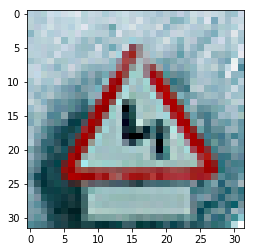

File:  test-data/5.bmp
Type:  14 Stop
Pre:  14 Stop 33.3703
Pre:  29 Bicycles crossing 4.27079
Pre:  15 No vehicles 2.4282
Pre:  1 Speed limit (30km/h) -0.213573
Pre:  3 Speed limit (60km/h) -1.1572


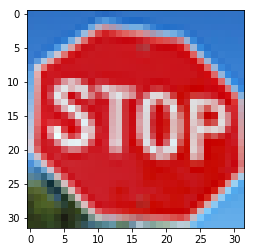

File:  test-data/3.bmp
Type:  8 Speed limit (120km/h)
Pre:  0 Speed limit (20km/h) 3.5835
Pre:  1 Speed limit (30km/h) 2.82731
Pre:  39 Keep left 2.29803
Pre:  15 No vehicles 1.91148
Pre:  4 Speed limit (70km/h) 0.884721


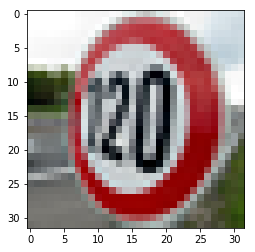

File:  test-data/688071187.bmp
Type:  3 Speed limit (60km/h)
Pre:  3 Speed limit (60km/h) 29.7834
Pre:  2 Speed limit (50km/h) 23.0325
Pre:  5 Speed limit (80km/h) 11.0004
Pre:  15 No vehicles 7.7941
Pre:  31 Wild animals crossing -0.500433


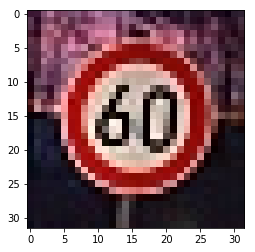

File:  test-data/171590640.bmp
Type:  30 Beware of ice/snow
Pre:  11 Right-of-way at the next intersection 16.3356
Pre:  21 Double curve 4.27044
Pre:  42 End of no passing by vehicles over 3.5 metric tons 4.23512
Pre:  40 Roundabout mandatory 3.24299
Pre:  23 Slippery road 0.577272


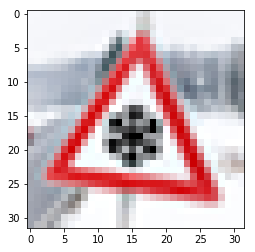

File:  test-data/689937191.bmp
Type:  9 No passing
Pre:  9 No passing 15.9583
Pre:  19 Dangerous curve to the left 11.2124
Pre:  15 No vehicles 4.87325
Pre:  10 No passing for vehicles over 3.5 metric tons 4.61441
Pre:  5 Speed limit (80km/h) 3.56307


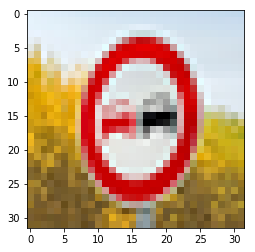

File:  test-data/2.bmp
Type:  27 Pedestrians
Pre:  11 Right-of-way at the next intersection 10.5009
Pre:  18 General caution 7.15797
Pre:  25 Road work 6.727
Pre:  30 Beware of ice/snow 6.68699
Pre:  20 Dangerous curve to the right 5.04717


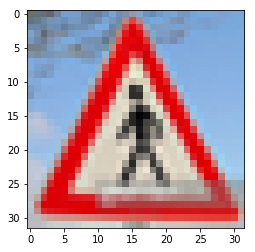

File:  test-data/142475664.bmp
Type:  18 General caution
Pre:  18 General caution 57.1584
Pre:  11 Right-of-way at the next intersection 19.4966
Pre:  26 Traffic signals 15.9026
Pre:  14 Stop 11.6353
Pre:  27 Pedestrians 11.2965


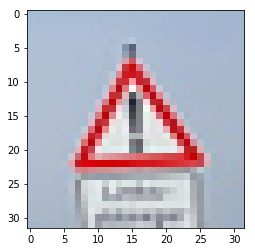

File:  test-data/6367584752.bmp
Type:  24 Road narrows on the right
Pre:  24 Road narrows on the right 35.6783
Pre:  29 Bicycles crossing 14.3032
Pre:  30 Beware of ice/snow 9.89587
Pre:  27 Pedestrians 9.7827
Pre:  25 Road work 6.96623


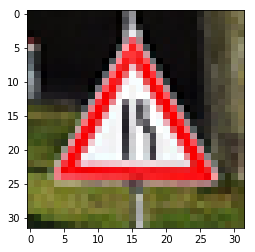

File:  test-data/459381359.bmp
Type:  9 No passing
Pre:  9 No passing 53.5205
Pre:  10 No passing for vehicles over 3.5 metric tons 19.1813
Pre:  16 Vehicles over 3.5 metric tons prohibited 16.2193
Pre:  15 No vehicles 15.9501
Pre:  5 Speed limit (80km/h) 10.2206


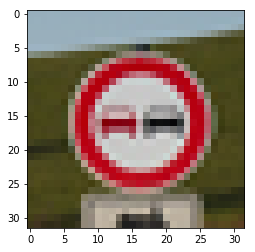

File:  test-data/106352829.bmp
Type:  31 Wild animals crossing
Pre:  31 Wild animals crossing 61.2059
Pre:  25 Road work 15.2528
Pre:  23 Slippery road 12.2539
Pre:  22 Bumpy road 8.54251
Pre:  21 Double curve 7.45202


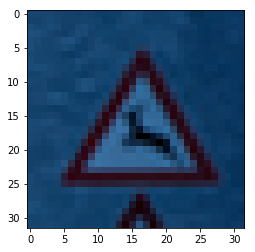

File:  test-data/171209328.bmp
Type:  14 Stop
Pre:  14 Stop 69.1038
Pre:  29 Bicycles crossing 4.3732
Pre:  15 No vehicles 2.30311
Pre:  32 End of all speed and passing limits -2.97447
Pre:  33 Turn right ahead -4.31351


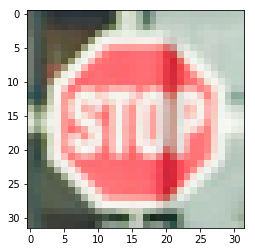

File:  test-data/689937195.bmp
Type:  12 Priority road
Pre:  12 Priority road 96.8575
Pre:  32 End of all speed and passing limits 3.56698
Pre:  14 Stop -8.16243
Pre:  11 Right-of-way at the next intersection -12.3169
Pre:  21 Double curve -17.0272


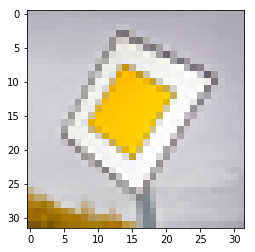

File:  test-data/469763319.bmp
Type:  27 Pedestrians
Pre:  27 Pedestrians 21.5726
Pre:  11 Right-of-way at the next intersection 14.7226
Pre:  18 General caution 12.5558
Pre:  28 Children crossing 8.6564
Pre:  19 Dangerous curve to the left 3.64727


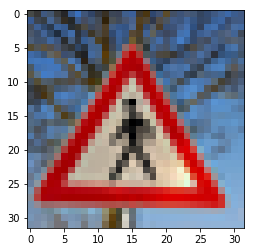

File:  test-data/465649993.bmp
Type:  3 Speed limit (60km/h)
Pre:  2 Speed limit (50km/h) 22.161
Pre:  1 Speed limit (30km/h) 8.90783
Pre:  4 Speed limit (70km/h) 5.01321
Pre:  5 Speed limit (80km/h) 4.73603
Pre:  7 Speed limit (100km/h) 2.50556


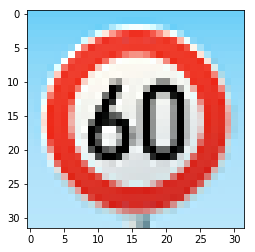

File:  test-data/165186251.bmp
Type:  30 Beware of ice/snow
Pre:  30 Beware of ice/snow 19.0871
Pre:  11 Right-of-way at the next intersection 16.7961
Pre:  28 Children crossing 3.55586
Pre:  23 Slippery road 2.99843
Pre:  27 Pedestrians 0.284532


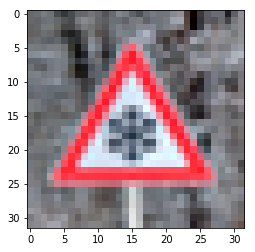

File:  test-data/57452573.bmp
Type:  13 Yield
Pre:  32 End of all speed and passing limits 21.7993
Pre:  41 End of no passing 3.53088
Pre:  34 Turn left ahead 0.958656
Pre:  40 Roundabout mandatory -0.00919942
Pre:  6 End of speed limit (80km/h) -0.0676789


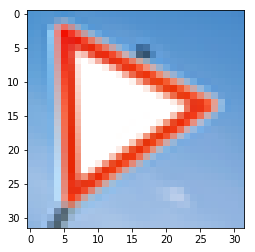

File:  test-data/459381113.bmp
Type:  2 Speed limit (50km/h)
Pre:  2 Speed limit (50km/h) 46.2037
Pre:  1 Speed limit (30km/h) 22.7507
Pre:  4 Speed limit (70km/h) 10.0719
Pre:  15 No vehicles 5.19576
Pre:  5 Speed limit (80km/h) 4.00983


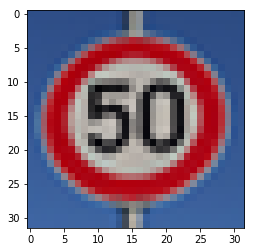

File:  test-data/532364055.bmp
Type:  9 No passing
Pre:  9 No passing 74.1457
Pre:  19 Dangerous curve to the left 25.6292
Pre:  10 No passing for vehicles over 3.5 metric tons 12.8222
Pre:  15 No vehicles 10.7884
Pre:  35 Ahead only 7.15245


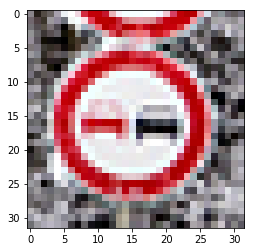

File:  test-data/122911974.bmp
Type:  12 Priority road
Pre:  12 Priority road 99.5719
Pre:  14 Stop -5.34828
Pre:  32 End of all speed and passing limits -7.65613
Pre:  29 Bicycles crossing -8.63034
Pre:  11 Right-of-way at the next intersection -16.375


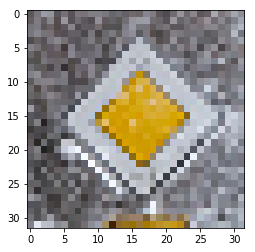

File:  test-data/649124149.bmp
Type:  1 Speed limit (30km/h)
Pre:  7 Speed limit (100km/h) 5.51376
Pre:  1 Speed limit (30km/h) 3.45241
Pre:  5 Speed limit (80km/h) 2.38077
Pre:  2 Speed limit (50km/h) 1.75675
Pre:  8 Speed limit (120km/h) 1.65891


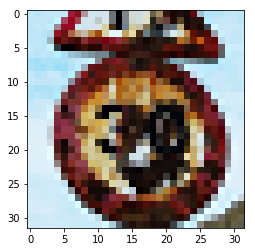

File:  test-data/96150383.bmp
Type:  1 Speed limit (30km/h)
Pre:  1 Speed limit (30km/h) 18.7706
Pre:  0 Speed limit (20km/h) 13.8004
Pre:  4 Speed limit (70km/h) 11.526
Pre:  2 Speed limit (50km/h) 4.86421
Pre:  5 Speed limit (80km/h) -0.159729


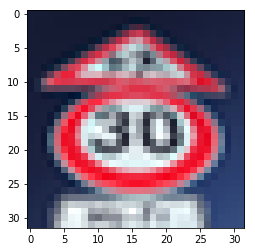

File:  test-data/678876687.bmp
Type:  31 Wild animals crossing
Pre:  23 Slippery road 5.82849
Pre:  30 Beware of ice/snow 5.74751
Pre:  11 Right-of-way at the next intersection 5.21141
Pre:  21 Double curve 4.74657
Pre:  19 Dangerous curve to the left 2.47593


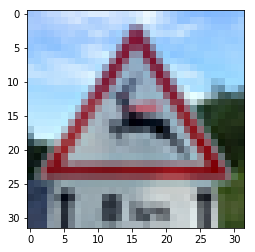

File:  test-data/646712504.bmp
Type:  2 Speed limit (50km/h)
Pre:  2 Speed limit (50km/h) 26.11
Pre:  1 Speed limit (30km/h) 10.5543
Pre:  4 Speed limit (70km/h) 5.88813
Pre:  5 Speed limit (80km/h) 4.72046
Pre:  15 No vehicles 4.35316


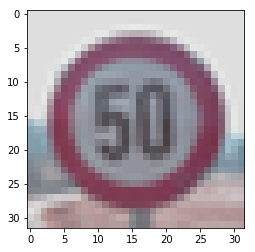

File:  test-data/636758475.bmp
Type:  25 Road work
Pre:  25 Road work 56.5726
Pre:  21 Double curve 8.53689
Pre:  30 Beware of ice/snow 6.28407
Pre:  20 Dangerous curve to the right 4.20553
Pre:  31 Wild animals crossing 1.29207


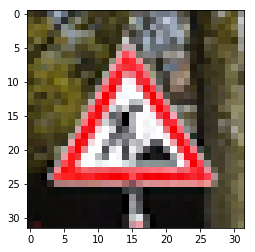

File:  test-data/469763309.bmp
Type:  40 Roundabout mandatory
Pre:  40 Roundabout mandatory 43.384
Pre:  6 End of speed limit (80km/h) 6.8977
Pre:  37 Go straight or left 4.48019
Pre:  38 Keep right 3.59518
Pre:  1 Speed limit (30km/h) 3.2751


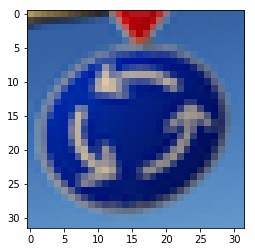

File:  test-data/1063528292.bmp
Type:  30 Beware of ice/snow
Pre:  11 Right-of-way at the next intersection 9.07139
Pre:  28 Children crossing 8.16718
Pre:  27 Pedestrians 7.72035
Pre:  30 Beware of ice/snow 7.00531
Pre:  20 Dangerous curve to the right 5.48678


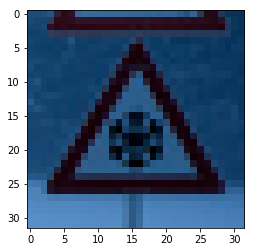

File:  test-data/139372530.bmp
Type:  31 Wild animals crossing
Pre:  31 Wild animals crossing 18.9549
Pre:  29 Bicycles crossing 7.42193
Pre:  21 Double curve 6.84952
Pre:  5 Speed limit (80km/h) 3.65153
Pre:  27 Pedestrians 2.63037


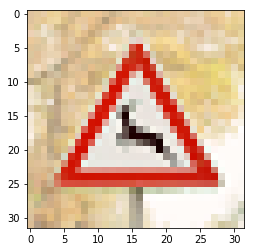

File:  test-data/6.bmp
Type:  13 Yield
Pre:  13 Yield 59.29
Pre:  3 Speed limit (60km/h) 10.6353
Pre:  15 No vehicles 2.66863
Pre:  5 Speed limit (80km/h) 2.20909
Pre:  9 No passing 0.533554


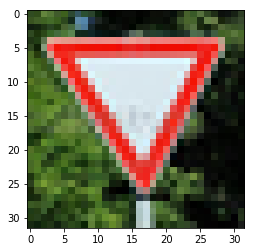

File:  test-data/122439599.bmp
Type:  21 Double curve
Pre:  21 Double curve 53.3198
Pre:  31 Wild animals crossing 16.5757
Pre:  1 Speed limit (30km/h) 13.5758
Pre:  2 Speed limit (50km/h) 13.066
Pre:  5 Speed limit (80km/h) 9.91273


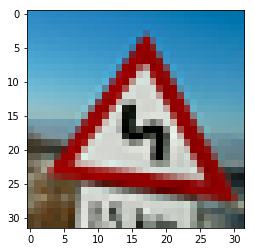

File:  test-data/153951752.bmp
Type:  2 Speed limit (50km/h)
Pre:  2 Speed limit (50km/h) 65.4802
Pre:  1 Speed limit (30km/h) 35.7761
Pre:  4 Speed limit (70km/h) 20.9007
Pre:  5 Speed limit (80km/h) 11.6028
Pre:  15 No vehicles 9.13664


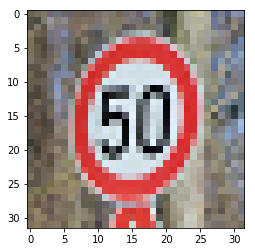

File:  test-data/125530335.bmp
Type:  18 General caution
Pre:  18 General caution 24.247
Pre:  27 Pedestrians 9.36503
Pre:  11 Right-of-way at the next intersection 8.6905
Pre:  26 Traffic signals 6.53023
Pre:  20 Dangerous curve to the right 3.61672


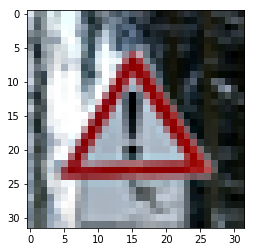

File:  test-data/656334061.bmp
Type:  1 Speed limit (30km/h)
Pre:  25 Road work 4.56561
Pre:  33 Turn right ahead 4.40654
Pre:  29 Bicycles crossing 2.98922
Pre:  14 Stop 2.90751
Pre:  12 Priority road 2.6728


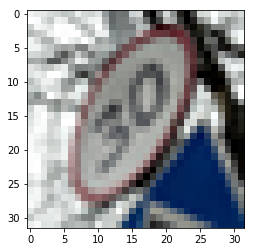

File:  test-data/459381295.bmp
Type:  28 Children crossing
Pre:  28 Children crossing 44.0761
Pre:  35 Ahead only 13.2671
Pre:  19 Dangerous curve to the left 7.76078
Pre:  22 Bumpy road 6.77964
Pre:  27 Pedestrians 5.63151


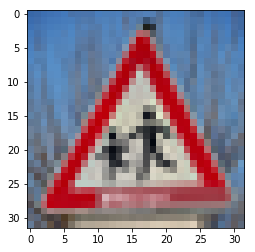

File:  test-data/4.bmp
Type:  8 Speed limit (120km/h)
Pre:  0 Speed limit (20km/h) 15.6229
Pre:  8 Speed limit (120km/h) 7.96967
Pre:  28 Children crossing 6.08955
Pre:  18 General caution 3.36528
Pre:  26 Traffic signals 3.03788


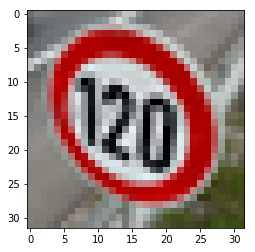

File:  test-data/459380825.bmp
Type:  18 General caution
Pre:  18 General caution 9.92734
Pre:  26 Traffic signals 6.6202
Pre:  22 Bumpy road 6.26291
Pre:  24 Road narrows on the right 5.38707
Pre:  25 Road work 5.11739


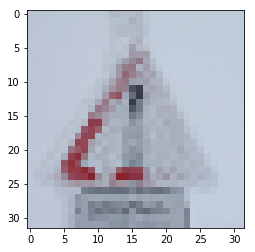

File:  test-data/97447859.bmp
Type:  1 Speed limit (30km/h)
Pre:  2 Speed limit (50km/h) 19.969
Pre:  1 Speed limit (30km/h) 17.2441
Pre:  4 Speed limit (70km/h) 9.62397
Pre:  39 Keep left 6.41679
Pre:  5 Speed limit (80km/h) 5.11086


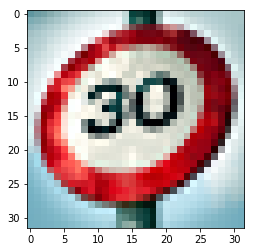

File:  test-data/459381275.bmp
Type:  11 Right-of-way at the next intersection
Pre:  11 Right-of-way at the next intersection 38.1386
Pre:  40 Roundabout mandatory 7.92537
Pre:  30 Beware of ice/snow 6.81134
Pre:  18 General caution 1.39738
Pre:  21 Double curve 0.674032


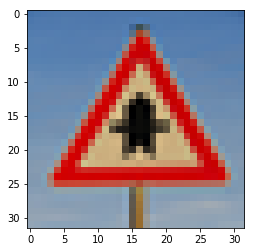

File:  test-data/1.bmp
Type:  25 Road work
Pre:  25 Road work 18.4649
Pre:  30 Beware of ice/snow 4.58333
Pre:  24 Road narrows on the right 4.35626
Pre:  31 Wild animals crossing 1.57189
Pre:  20 Dangerous curve to the right 0.941434


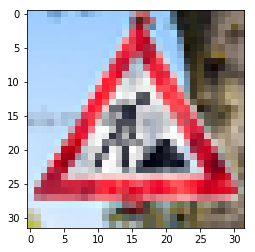

File:  test-data/95909520.bmp
Type:  25 Road work
Pre:  25 Road work 34.4235
Pre:  2 Speed limit (50km/h) 8.7344
Pre:  5 Speed limit (80km/h) 6.20459
Pre:  3 Speed limit (60km/h) 4.67218
Pre:  24 Road narrows on the right 2.94636


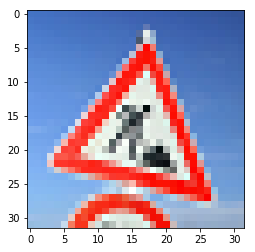

File:  test-data/674491693.bmp
Type:  17 No entry
Pre:  17 No entry 46.6839
Pre:  9 No passing 10.9115
Pre:  23 Slippery road 10.7555
Pre:  16 Vehicles over 3.5 metric tons prohibited 8.23244
Pre:  19 Dangerous curve to the left 2.81226


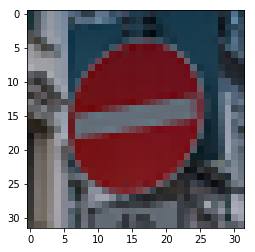

File:  test-data/1539517522.bmp
Type:  21 Double curve
Pre:  21 Double curve 50.239
Pre:  11 Right-of-way at the next intersection 34.4096
Pre:  25 Road work 29.4411
Pre:  30 Beware of ice/snow 28.5136
Pre:  31 Wild animals crossing 10.1392


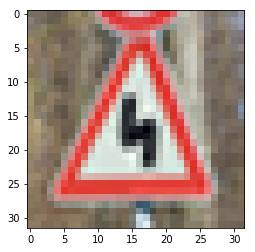

File:  test-data/548310403.bmp
Type:  13 Yield
Pre:  13 Yield 20.6534
Pre:  15 No vehicles 8.06621
Pre:  3 Speed limit (60km/h) 3.1423
Pre:  35 Ahead only 2.74613
Pre:  9 No passing 2.56263


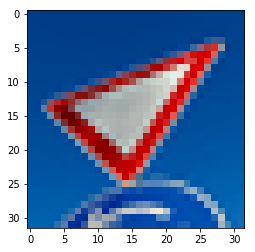

File:  test-data/607770600.bmp
Type:  28 Children crossing
Pre:  28 Children crossing 89.7841
Pre:  35 Ahead only 35.7093
Pre:  29 Bicycles crossing 26.5204
Pre:  22 Bumpy road 25.6216
Pre:  19 Dangerous curve to the left 12.3576


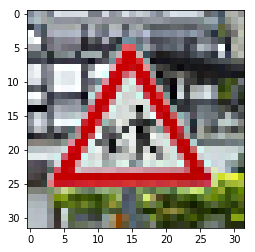

File:  test-data/688963145.bmp
Type:  7 Speed limit (100km/h)
Pre:  7 Speed limit (100km/h) 19.3733
Pre:  5 Speed limit (80km/h) 12.6116
Pre:  8 Speed limit (120km/h) 6.94796
Pre:  16 Vehicles over 3.5 metric tons prohibited 3.94948
Pre:  2 Speed limit (50km/h) 1.05437


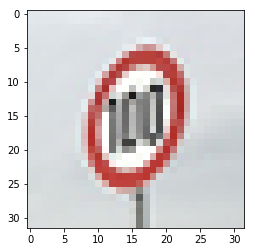

File:  test-data/142641434.bmp
Type:  14 Stop
Pre:  14 Stop 26.7928
Pre:  29 Bicycles crossing 4.09793
Pre:  25 Road work 2.05886
Pre:  15 No vehicles 0.254827
Pre:  33 Turn right ahead -0.0894577


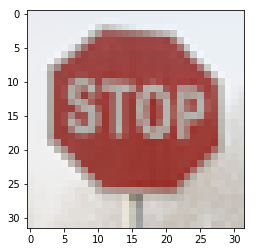

File:  test-data/155907900.bmp
Type:  4 Speed limit (70km/h)
Pre:  18 General caution 9.56075
Pre:  14 Stop 7.4923
Pre:  0 Speed limit (20km/h) 4.93237
Pre:  15 No vehicles 3.69894
Pre:  25 Road work 3.53795


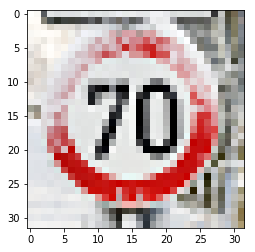

In [11]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
import tensorflow as tf

#n_classes = 43

#x = tf.placeholder(tf.float32, (None, 32, 32, image_depth))
#y = tf.placeholder(tf.int32, (None))
#one_hot_y = tf.one_hot(y, n_classes)

# Training pipeline
#rate = 0.001

#logits = LeNet(x)

#evaluation

#correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
#accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#saver = tf.train.Saver()
do_test_operation = tf.argmax(logits, 1)
top5 = tf.nn.top_k(logits, k=5)

def test_operation(X_data, y_data):
    sess = tf.get_default_session()
    result = sess.run(top5, feed_dict={x: X_data, y: y_data})
    return result

'''
def evaluate_test(X_data, y_data):
    total_accuracy = 0
    sess = tf.get_default_session()
    total_accuracy = sess.run(accuracy_operation, feed_dict={x: X_data, y: y_data})
    return total_accuracy
    '''
label = np.array([27, 8, 8, 13, 25, 14])
#print("shape ", X_train.shape)
#print("shape ", y_train.shape)
#print("type ", y_train.dtype)
#print("shape ", test_data.shape)
#print("shape ", label.shape)
# Test the model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    #test_accuracy = evaluate(test_data, label)
    top = test_operation(test_data, label)
    #print("Top 5 result = ", top)


def show_image_with_top5(files, index, label, top):
    print("File: ", files[index])
    print("Type: ", label[index], trafficSignName(label[index]))
    values = top.values[index]
    indices = top.indices[index]
    print("Pre: ", indices[0], trafficSignName(indices[0]), values[0])
    print("Pre: ", indices[1], trafficSignName(indices[1]), values[1])
    print("Pre: ", indices[2], trafficSignName(indices[2]), values[2])
    print("Pre: ", indices[3], trafficSignName(indices[3]), values[3])
    print("Pre: ", indices[4], trafficSignName(indices[4]), values[4])
    image = mpimg.imread(files[index])
    fig = plt.figure(1, (4., 4.))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 1),  # creates 1xn grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
    grid[0].imshow(image)
    plt.show()

for i in range(num_pic):
    show_image_with_top5(file_list, i, test_y, top)

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [12]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 